In [1]:
import pandas as pd

# Load the dataset
file_path = "C:\\Users\\WELCOME\\Desktop\\intern\\Ifood\\ifood_df.csv"
df = pd.read_csv(file_path)

# Display basic information about the dataset
df_info = df.info()
df_head = df.head()

df_info, df_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

(None,
     Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  MntMeatProducts  \
 0  58138.0        0         0       58       635         88              546   
 1  46344.0        1         1       38        11          1                6   
 2  71613.0        0         0       26       426         49              127   
 3  26646.0        1         0       26        11          4               20   
 4  58293.0        1         0       94       173         43              118   
 
    MntFishProducts  MntSweetProducts  MntGoldProds  ...  marital_Together  \
 0              172                88            88  ...                 0   
 1                2                 1             6  ...                 0   
 2              111                21            42  ...                 1   
 3               10                 3             5  ...                 1   
 4               46                27            15  ...                 0   
 
    marital_Widow  education_2n Cyc

In [2]:
# Check for missing values and duplicates
missing_values = df.isnull().sum()
duplicates = df.duplicated().sum()

# Standardize numerical features
from sklearn.preprocessing import StandardScaler

numerical_features = ['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 
                      'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 
                      'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Age', 'Customer_Days', 
                      'MntTotal', 'MntRegularProds']

scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[numerical_features] = scaler.fit_transform(df[numerical_features])

missing_values, duplicates, df_scaled.head()


(Income                  0
 Kidhome                 0
 Teenhome                0
 Recency                 0
 MntWines                0
 MntFruits               0
 MntMeatProducts         0
 MntFishProducts         0
 MntSweetProducts        0
 MntGoldProds            0
 NumDealsPurchases       0
 NumWebPurchases         0
 NumCatalogPurchases     0
 NumStorePurchases       0
 NumWebVisitsMonth       0
 AcceptedCmp3            0
 AcceptedCmp4            0
 AcceptedCmp5            0
 AcceptedCmp1            0
 AcceptedCmp2            0
 Complain                0
 Z_CostContact           0
 Z_Revenue               0
 Response                0
 Age                     0
 Customer_Days           0
 marital_Divorced        0
 marital_Married         0
 marital_Single          0
 marital_Together        0
 marital_Widow           0
 education_2n Cycle      0
 education_Basic         0
 education_Graduation    0
 education_Master        0
 education_PhD           0
 MntTotal                0
 

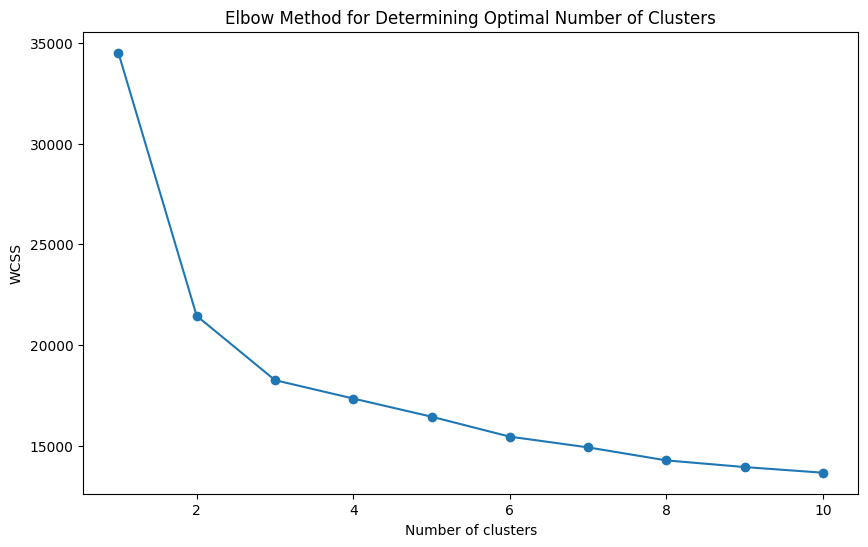

In [3]:
# Remove duplicates
df_cleaned = df_scaled.drop_duplicates()

# Features for clustering
features_for_clustering = [
    'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
    'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
    'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
    'NumWebVisitsMonth', 'MntTotal', 'MntRegularProds'
]

X = df_cleaned[features_for_clustering]

# Apply K-means clustering
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Determine the optimal number of clusters using the Elbow method
wcss = []  # Within-cluster sum of squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the Elbow method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-')
plt.title('Elbow Method for Determining Optimal Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [ ]:
# Adjusting the K-means clustering process to be more efficient
from sklearn.cluster import KMeans

# Reduce the number of clusters to test and use 'k-means++' for better initialization
wcss = []  # Within-cluster sum of squares
cluster_range = range(1, 11)

for i in cluster_range:
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the Elbow method graph
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, wcss, marker='o', linestyle='-')
plt.title('Elbow Method for Determining Optimal Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()
